In [21]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [22]:
# Part 1
np.random.seed(42)

def estimate_pi(n):
  inside_circle = 0

  for _ in range(n):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    distance = ((x - 0.5) ** 2 + (y - 0.5) ** 2) ** 0.5

    if distance <= 0.5:
      inside_circle += 1

  ratio = inside_circle / n
  estimated_pi = ratio * 4

  return estimated_pi

estimate_pi(10000000)


3.141122

In [23]:
# Part 2
true_mean = 2
true_std = 2
num_simulations = 1000
sample_sizes = [10, 25, 50, 100, 250, 500]

np.random.seed(20)

first_estimators_bias = []
second_estimators_bias = []

for idx, n in enumerate(sample_sizes):
  first_estimators = []
  second_estimators = []

  for _ in range(num_simulations):
    samples = np.random.normal(true_mean, true_std, n)
    sample_mean = np.mean(samples)

    total_squared_error = 0
    for i in range(0, n):
      total_squared_error += (samples[i] - sample_mean) ** 2

    first_estimators.append(total_squared_error / (n - 1) - true_std ** 2)
    second_estimators.append(total_squared_error / n - true_std ** 2)

  first_estimators_bias.append(np.mean(first_estimators))
  second_estimators_bias.append(np.mean(second_estimators))

  print(f"Sample size {n}:")
  print(f"Bias of the first estimator: {first_estimators_bias[idx]}")
  print(f"Bias of the second estimator: {second_estimators_bias[idx]}")


Sample size 10:
Bias of the first estimator: -0.013092100170826512
Bias of the second estimator: -0.4117828901537439
Sample size 25:
Bias of the first estimator: 0.07770810175999109
Bias of the second estimator: -0.08540022231040856
Sample size 50:
Bias of the first estimator: 0.017288631440565437
Bias of the second estimator: -0.06305714118824586
Sample size 100:
Bias of the first estimator: -0.0010642020985140944
Bias of the second estimator: -0.04105356007752896
Sample size 250:
Bias of the first estimator: -0.0034477435906600054
Bias of the second estimator: -0.019433952616297358
Sample size 500:
Bias of the first estimator: 0.00048256937791492713
Bias of the second estimator: -0.007518395760840913


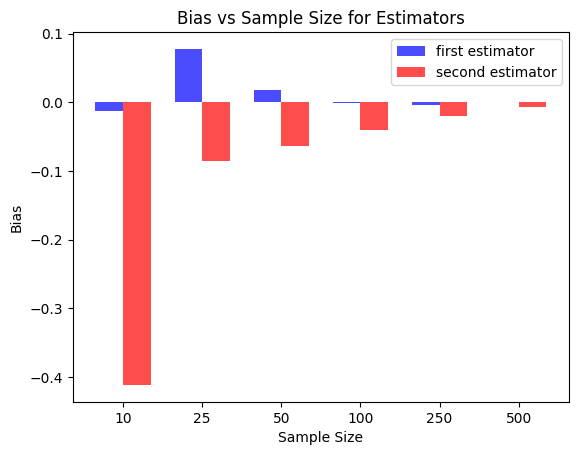

In [24]:
# Plotting
bar_width = 0.35
index = np.arange(len(sample_sizes))

plt.bar(index, first_estimators_bias, width=bar_width, label='first estimator', color='b', alpha=0.7)
plt.bar(index + bar_width, second_estimators_bias, width=bar_width, label='second estimator', color='r', alpha=0.7)

plt.xlabel('Sample Size')
plt.ylabel('Bias')
plt.title('Bias vs Sample Size for Estimators')
plt.xticks(index + bar_width / 2, sample_sizes)
plt.legend()
plt.show()

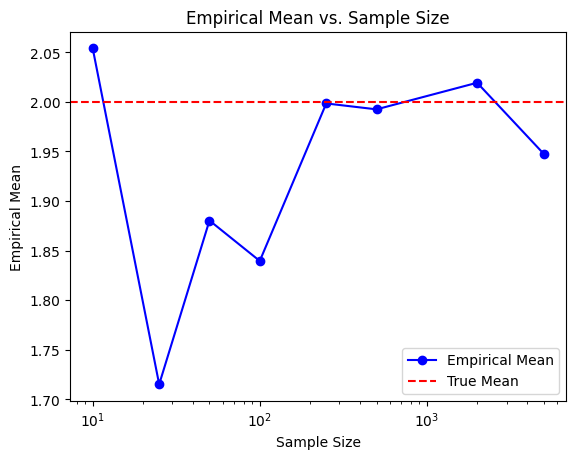

In [25]:
# Part 4a
exponential_mean = 2
sample_sizes = [10, 25, 50, 100, 250, 500, 2000, 5000]

np.random.seed(42)

empirical_means = []

def exponential(n):
  samples = np.random.exponential(scale=exponential_mean, size=n)
  return np.mean(samples)

for n in sample_sizes:
  empirical_means.append(exponential(n))

# Plot the empirical means vs. sample sizes
plt.plot(sample_sizes, empirical_means, marker='o', linestyle='-', color='b', label='Empirical Mean')
plt.axhline(y=exponential_mean, color='r', linestyle='--', label='True Mean')

# Set plot labels and title
plt.xlabel('Sample Size')
plt.ylabel('Empirical Mean')
plt.title('Empirical Mean vs. Sample Size')
plt.legend()
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization

# Show the plot
plt.show()



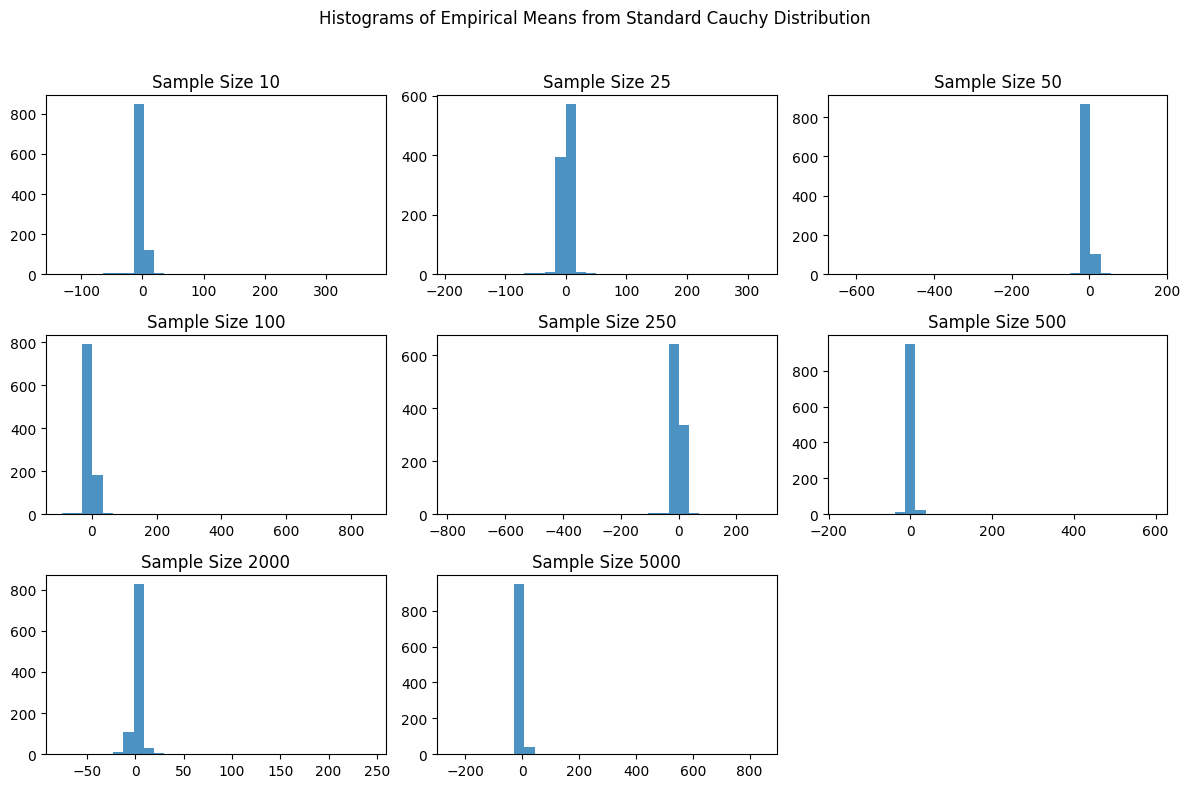

In [47]:
# Part 4b
num_simulations = 1000
sample_sizes = [10, 25, 50, 100, 250, 500, 2000, 5000]

np.random.seed(20)

plt.figure(figsize=(12, 8))
for i, n in enumerate(sample_sizes, 1):
  empirical_means = []
  plt.subplot(3, 3, i)
  for _ in range(num_simulations):
    samples = np.random.standard_cauchy(n)
    empirical_means.append(np.mean(samples))

  plt.hist(empirical_means, bins=30, alpha=0.8)
  #plt.xlim(-150, 150)
  plt.title(f'Sample Size {n}')

plt.suptitle('Histograms of Empirical Means from Standard Cauchy Distribution')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
